# Distribution of clusters within perturbation

What is the variation of cluster size within perturbation (cell-cell heterogeneity) -- these might be clusters to merge

In [7]:
from campa.tl import Experiment, FeatureExtractor, thresholded_count, thresholded_median
from campa_ana.constants import SOURCE_DIR
from pathlib import Path
from campa.pl import hex2rgb
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad
import pandas as pd

## VAE_all/CondVAE_pert-CC

In [2]:
exp = Experiment.from_dir('VAE_all/CondVAE_pert-CC')
extrs = {data_dir: FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features.h5ad')) 
    for data_dir in exp.data_params['data_dirs']}

In [8]:
annotation = exp.get_cluster_annotation(cluster_name='clustering_res0.5')
annotation

,clustering_res0.5,clustering_res0.5_colors,annotation,annotation_colors,annotation_coarse,annotation_coarse_colors
index,,,,,,
0,0,#1f77b4,Nucleoplasm,#118ab2,Nucleoplasm,#118ab2
1,1,#ff7f0e,Nucleolus,#073b4c,Nucleolus,#073b4c
2,2,#2ca02c,Nucleoplasm,#118ab2,Nucleoplasm,#118ab2
3,3,#d62728,Nuclear speckles,#ffd166,Nuclear speckles,#ffd166
4,4,#9467bd,Extra-nuclear,#c6beaa,Extra-nuclear,#c6beaa
5,5,#c49c94,Nucleoplasm,#118ab2,Nucleoplasm,#118ab2
6,6,#f7b6d2,Nuclear periphery,#06d6a0,Nucleoplasm,#118ab2
7,7,#c7c7c7,Nucleoplasm,#118ab2,Nucleoplasm,#118ab2
8,8,#dbdb8d,PML bodies,#ef476f,PML bodies,#ef476f


In [3]:
extr = extrs['184A1_unperturbed/I09']

In [9]:
extr.adata

AnnData object with n_obs × n_vars = 557 × 34
    obs: 'mapobject_id', 'plate_name', 'well_name', 'well_pos_y', 'well_pos_x', 'tpoint', 'zplane', 'label', 'is_border', 'mapobject_id_cell', 'plate_name_cell', 'well_name_cell', 'well_pos_y_cell', 'well_pos_x_cell', 'tpoint_cell', 'zplane_cell', 'label_cell', 'is_border_cell', 'is_mitotic', 'is_mitotic_labels', 'is_polynuclei_HeLa', 'is_polynuclei_HeLa_labels', 'is_polynuclei_184A1', 'is_polynuclei_184A1_labels', 'is_SBF2_Sphase_labels', 'is_SBF2_Sphase', 'Heatmap-48', 'cell_cycle', 'description', 'dimensions', 'id', 'cell_type', 'EU', 'duration', 'perturbation', 'secondary_only', 'siRNA', 'perturbation_duration', 'LocalDensity_Nuclei_800', 'TR_factor', 'TR_norm', 'TR', 'TR_factor_DMSO-unperturbed', 'TR_norm_DMSO-unperturbed', 'obj_id_int'
    uns: 'clusters', 'params'
    obsm: 'size'
    layers: 'intensity_0', 'intensity_1', 'intensity_2', 'intensity_3', 'intensity_4', 'intensity_5', 'intensity_6', 'intensity_7', 'intensity_8', 'intensi

In [11]:
import pandas as pd

In [15]:
sizes = []
perturbation = []
for extr in extrs.values():
    sizes.append(extr.adata.obsm['size'])
    perturbation.append(extr.adata.obs['perturbation_duration'])

sizes = pd.concat(sizes)
perturbation = pd.concat(perturbation)

In [17]:
sizes['perturbation'] = perturbation

In [20]:
mean = sizes.groupby('perturbation').mean()
std = sizes.groupby('perturbation').std()

In [21]:
mean

,all,0,1,2,3,4,5,6,7,8,9
perturbation,,,,,,,,,,,
AZD4573-120,14197.841484,944.996627,1719.575885,4280.552277,1718.436762,1601.040472,1097.733558,923.457841,1129.837268,715.983980,66.226813
AZD4573-30,13337.011843,1339.613800,2400.796087,2916.632338,1588.716787,1487.519053,1026.428424,860.842430,1097.998455,559.230175,59.234295
CX5461-120,12759.428479,3364.347294,1186.092139,1413.659149,1318.350515,1421.540593,1279.289948,1548.917526,408.686856,653.285438,165.259021
DMSO-120,12321.420455,3169.365530,2511.905303,892.035985,1289.155303,1225.776515,953.348485,1313.560606,314.625000,558.240530,93.407197
DMSO-720,12369.759076,3036.778878,2312.348185,1475.689769,1195.155116,1159.074257,1132.194719,1134.237624,307.417492,498.331683,118.531353
Meayamycin-720,15509.854305,1476.434437,2520.174834,3935.059603,1934.639735,1438.724503,1915.679470,1154.388079,336.917881,672.145695,125.690066
TSA-30,12694.455394,3052.710787,2490.278134,1423.442566,1240.662391,1464.527697,949.816327,929.580758,452.576676,569.891545,120.968513
Triptolide-120,12065.223969,668.166012,2202.480354,2634.290766,1843.164047,1439.950884,847.158153,961.704322,797.352652,573.746562,97.210216
normal,12804.069128,2919.615868,2463.324823,1671.243519,1232.456009,1146.961508,1057.182639,906.608013,643.304792,633.589552,129.782404


In [23]:
std

,all,0,1,2,3,4,5,6,7,8,9
perturbation,,,,,,,,,,,
AZD4573-120,3840.326983,1491.932496,992.918335,3921.051578,559.069486,643.327048,2371.379075,1271.245610,1592.896328,299.992251,75.431350
AZD4573-30,3625.466365,1673.794858,1079.125124,2889.132960,561.635812,444.478815,1992.437301,1107.836004,1517.894952,234.884968,51.291815
CX5461-120,3386.360019,2696.580175,494.535505,1987.321020,615.776104,547.729217,2466.403738,1064.962108,935.082251,316.624478,306.178827
DMSO-120,2989.891529,2095.158197,794.854512,1285.015745,536.675792,382.087400,1855.317429,865.190622,723.196444,210.901996,60.649574
DMSO-720,3111.817725,2169.710541,821.475962,1689.649375,549.656361,398.987180,2115.228789,844.891546,612.596489,219.770776,70.086734
Meayamycin-720,4164.781914,2194.454988,720.753712,3485.456007,652.116334,798.511030,2076.830814,1210.873543,884.090428,282.346768,75.904113
TSA-30,3192.092709,2137.617649,821.678711,1709.919490,518.243136,504.143399,1900.183210,752.205121,804.325978,261.312156,72.285309
Triptolide-120,3015.998968,995.387697,982.184918,2384.899299,676.765796,480.325274,2050.066012,1140.886379,1156.858736,305.161699,73.206440
normal,3433.357769,2218.468714,864.088724,1843.447395,588.704343,483.055321,1957.274594,811.725448,1076.916947,300.528857,103.403791


## within perturbation variation

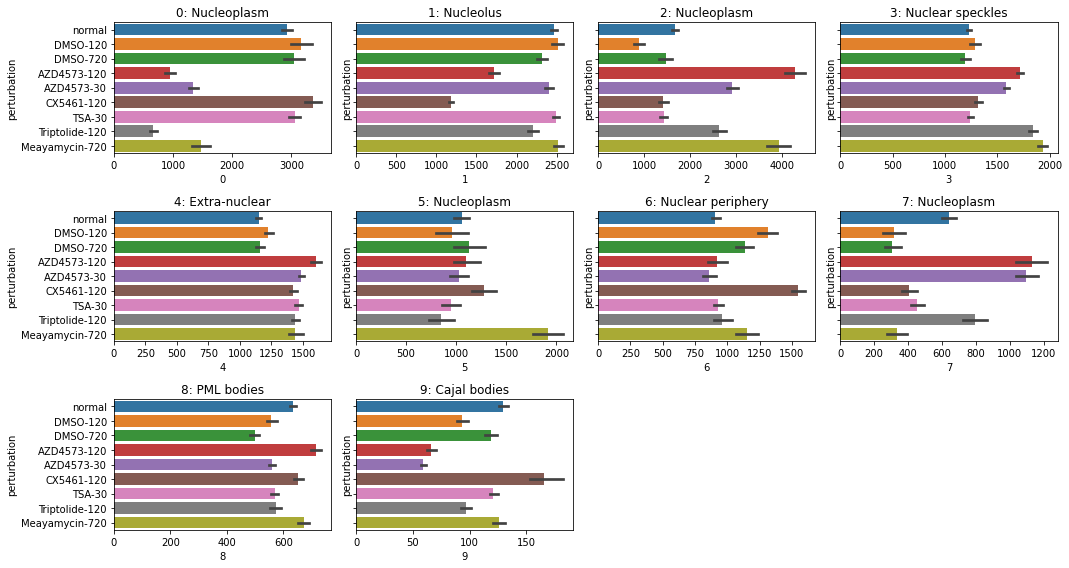

In [41]:
fig, axes = plt.subplots(3,4, figsize=(15,8), sharey=True)
for i, ax in enumerate(axes.flat):
    if i > 9:
        ax.axis('off')
        continue
    sns.barplot(data=sizes, x=str(i), y='perturbation', ax=ax)
    ax.set_title(f"{i}: {annotation.loc[i]['annotation']}")
plt.tight_layout()

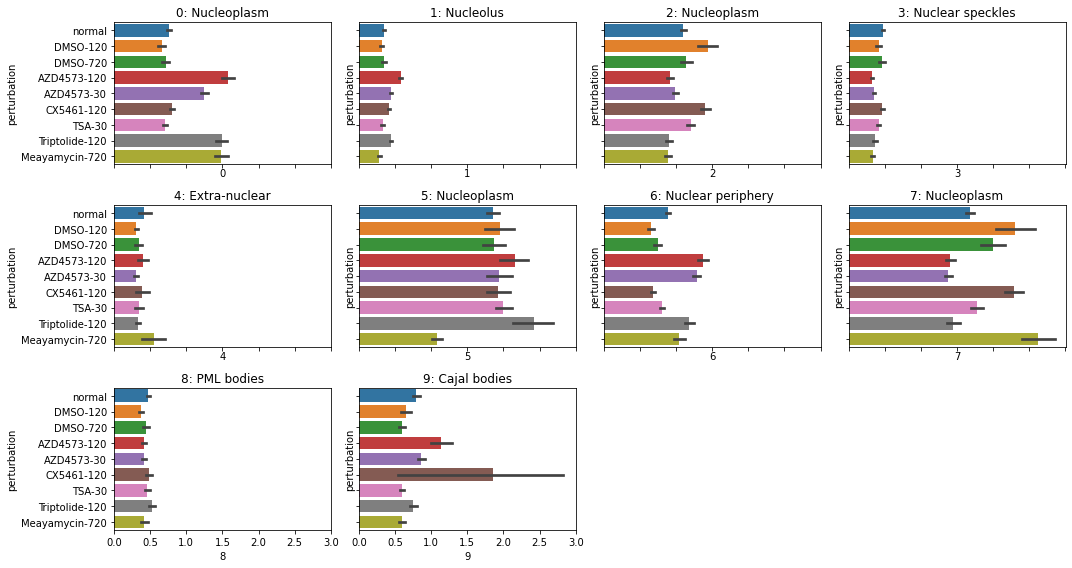

In [42]:
estimator = lambda x: x.std()/x.mean()

fig, axes = plt.subplots(3,4, figsize=(15,8), sharey=True, sharex=True)
for i, ax in enumerate(axes.flat):
    if i > 9:
        ax.axis('off')
        continue
    sns.barplot(data=sizes, x=str(i), y='perturbation', ax=ax, estimator=estimator)
    ax.set_title(f"{i}: {annotation.loc[i]['annotation']}")
plt.tight_layout()

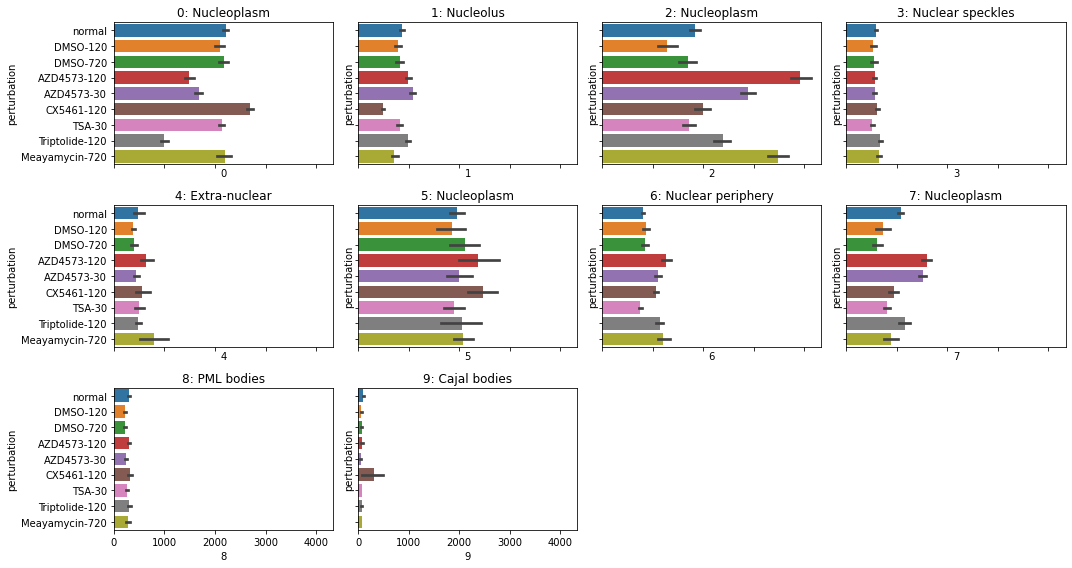

In [43]:
estimator = lambda x: x.std()
fig, axes = plt.subplots(3,4, figsize=(15,8), sharey=True, sharex=True)
for i, ax in enumerate(axes.flat):
    if i > 9:
        ax.axis('off')
        continue
    sns.barplot(data=sizes, x=str(i), y='perturbation', ax=ax, estimator=estimator)
    ax.set_title(f"{i}: {annotation.loc[i]['annotation']}")
plt.tight_layout()

## accross perturbation variation

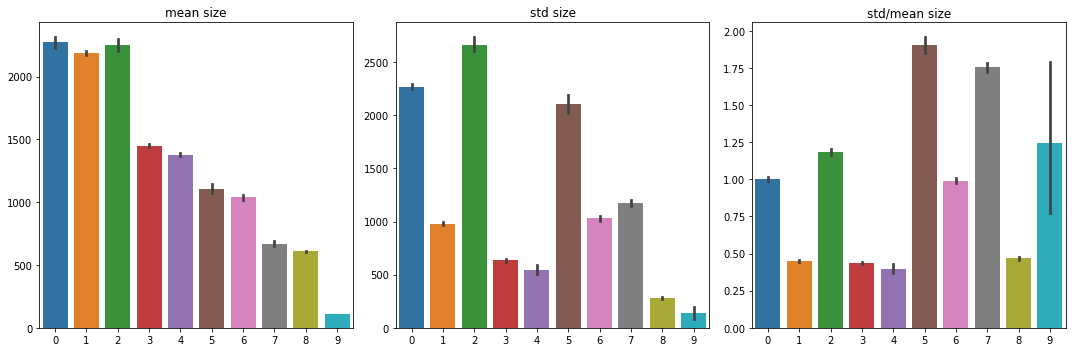

In [53]:

fig, axes = plt.subplots(1,3, figsize=(15,5))

estimator = lambda x: x.mean()
sns.barplot(data=sizes[['0','1','2','3','4','5','6','7','8','9']], ax=axes[0], estimator=estimator)
axes[0].set_title('mean size')

estimator = lambda x: x.std()
sns.barplot(data=sizes[['0','1','2','3','4','5','6','7','8','9']], estimator=estimator, ax=axes[1])
axes[1].set_title('std size')

estimator = lambda x: x.std()/x.mean()
sns.barplot(data=sizes[['0','1','2','3','4','5','6','7','8','9']], estimator=estimator, ax=axes[2])
axes[2].set_title('std/mean size')

plt.tight_layout()

In [57]:
sizes.mean()


/var/folders/s9/0d6yy20d44v60qd0nfkjlqdd541mvv/T/ipykernel_5593/282397234.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sizes.mean()


all    13074.444885
0       2272.207799
1       2190.872384
2       2249.237424
3       1449.775068
4       1378.069885
5       1105.624494
6       1038.558238
7        670.079338
8        610.047941
9        109.972316
dtype: float64

In [54]:
sns.barplot?

Signature:
sns.barplot(
    *,
    x=None,
    y=None,
    hue=None,
    data=None,
    order=None,
    hue_order=None,
    estimator=<function mean at 0x7fa0af432af0>,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    errcolor='.26',
    errwidth=None,
    capsize=None,
    dodge=True,
    ax=None,
    **kwargs,
)
Docstring:
Show point estimates and confidence intervals as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric
variable with the height of each rectangle and provides some indication of
the uncertainty around that estimate using error bars. Bar plots include 0
in the quantitative axis range, and they are a good choice when 0 is a
meaningful value for the quantitative variable, and you want to make
comparisons against it.

For datasets where 0 is not a meaningful value, a point plot will allow you
to focus on differences between levels of one or more catego

In [3]:
exp = Experiment.from_dir('VAE_SBF2/CondVAE_siRNA-CC')
extrs = {data_dir: FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_seed3.h5ad')) 
    for data_dir in exp.data_params['data_dirs']}

In [5]:
exp.get_cluster_annotation?

Signature:
exp.get_cluster_annotation(
    cluster_name: str = 'clustering',
    cluster_dir: Optional[str] = None,
) -> pandas.core.frame.DataFrame
Docstring:
Read cluster_annotation file for full data from disk.

Looks for file ``{cluster_name}_annotation.csv`` in ``cluster_dir``.
If ``cluster_dir`` is None, is is set to the first dir of ``aggregated/sub-*``.

Parameters
----------
cluster_name
    Name of clustering.
cluster_dir
    Directory in which to find the clustering.

Returns
-------
The cluster annotation file.
File:      ~/projects/pelkmans/software_new/campa/campa/tl/_experiment.py
Type:      method


In [6]:
annotation = exp.get_cluster_annotation(cluster_dir='aggregated/sub-0.005_sub-0.33', cluster_name='clustering_res0.9_sub-0.33_seed3')
annotation

,clustering_res0.9_sub-0.33_seed3,clustering_res0.9_sub-0.33_seed3_colors,annotation,annotation_colors,annotation_cytoplasm,annotation_cytoplasm_colors,annotation_cell,annotation_cell_colors
index,,,,,,,,
0,0,#1f77b4,ER (perinuclear),#069D6B,cytoplasm,#1f77b4,cell,#1f77b4
1,1,#aec7e8,Nucleoplasm,#118ab2,nucleus,#9edae5,cell,#1f77b4
2,2,#ff7f0e,Cytoplasm,#EFDCA9,cytoplasm,#1f77b4,cell,#1f77b4
3,3,#ffbb78,Cytoplasm,#EFDCA9,cytoplasm,#1f77b4,cell,#1f77b4
4,4,#2ca02c,Cytoplasm,#EFDCA9,cytoplasm,#1f77b4,cell,#1f77b4
5,5,#98df8a,Cytoplasm,#EFDCA9,cytoplasm,#1f77b4,cell,#1f77b4
6,6,#d62728,Cell-cell contacts,#F06543,cytoplasm,#1f77b4,cell,#1f77b4
7,7,#ff9896,Nuclear periphery,#06d6a0,nucleus,#9edae5,cell,#1f77b4
8,8,#9467bd,Nucleolus,#073b4c,nucleus,#9edae5,cell,#1f77b4


In [107]:
extr.adata.obsm['size'].mean()

all    78551.190345
0      11680.899310
1      10647.728276
10      1696.845517
11      2508.227586
12      2904.260690
13      2483.173793
14      1114.304828
15       395.504828
16       520.035862
17       374.932414
18       476.849655
19       233.788966
2       7680.875862
20         6.371034
3       5040.827586
4       6392.222069
5       5293.051034
6       7190.638621
7       4825.830345
8       4436.885517
9       2647.936552
dtype: float64

In [97]:
sizes = []
perturbation = []
for extr in extrs.values():
    sizes.append(extr.adata.obsm['size'])
    perturbation.append(extr.adata.obs['siRNA'])

sizes = pd.concat(sizes)
perturbation = pd.concat(perturbation).reset_index(drop=True)
sizes = sizes.reset_index(drop=True)

sizes['perturbation'] = perturbation
mean = sizes.groupby('perturbation').mean()
std = sizes.groupby('perturbation').std()


### within perturbation variation

std / mean

Remove Antibody Aggregates (cluster number 20) from plot -> also excluded from main figures

In [98]:
# normalise sizes by "all" (overall cell size)
sizes = sizes.drop(columns='perturbation')
sizes = (sizes.T / sizes.T.loc['all']).T
sizes['perturbation'] = perturbation

In [99]:
norm_sizes = sizes.copy()
norm_sizes[sizes.perturbation == 'scrambled'] = sizes[sizes.perturbation == 'scrambled'] / sizes[sizes.perturbation == 'scrambled'].mean()
norm_sizes[sizes.perturbation == 'SBF2'] = sizes[sizes.perturbation == 'SBF2'] / sizes[sizes.perturbation == 'SBF2'].mean()
norm_sizes['perturbation'] = sizes['perturbation']

/var/folders/s9/0d6yy20d44v60qd0nfkjlqdd541mvv/T/ipykernel_8659/1220811623.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  norm_sizes[sizes.perturbation == 'scrambled'] = sizes[sizes.perturbation == 'scrambled'] / sizes[sizes.perturbation == 'scrambled'].mean()
/var/folders/s9/0d6yy20d44v60qd0nfkjlqdd541mvv/T/ipykernel_8659/1220811623.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  norm_sizes[sizes.perturbation == 'SBF2'] = sizes[sizes.perturbation == 'SBF2'] / sizes[sizes.perturbation == 'SBF2'].mean()


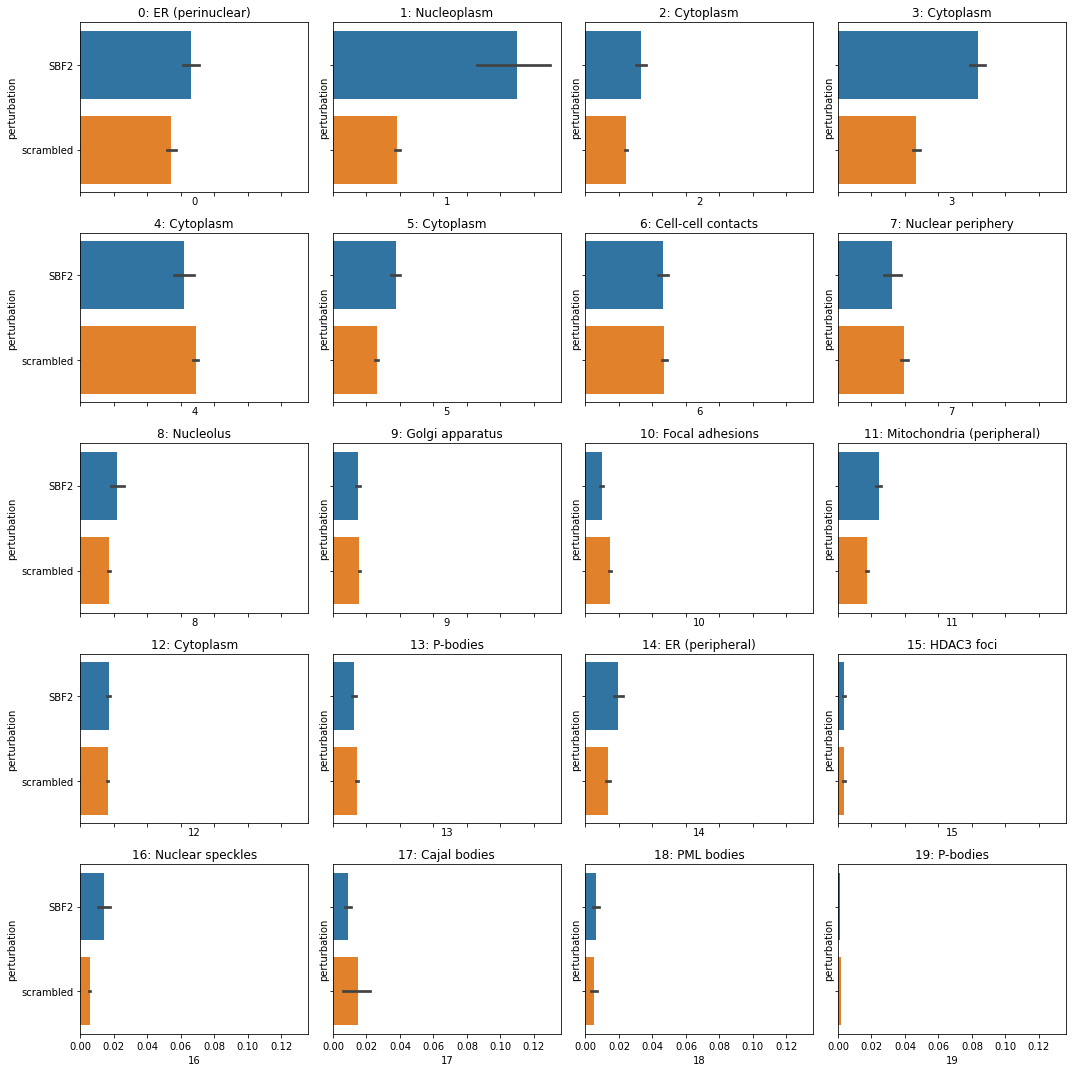

In [101]:
estimator = lambda x: x.std()

fig, axes = plt.subplots(5,4, figsize=(15,15), sharey=True, sharex=True)
for i, ax in enumerate(axes.flat):
    if i > 19:
        ax.axis('off')
        continue
    sns.barplot(data=sizes, x=str(i), y='perturbation', ax=ax, estimator=estimator)
    ax.set_title(f"{i}: {annotation.loc[i]['annotation']}")
plt.tight_layout()

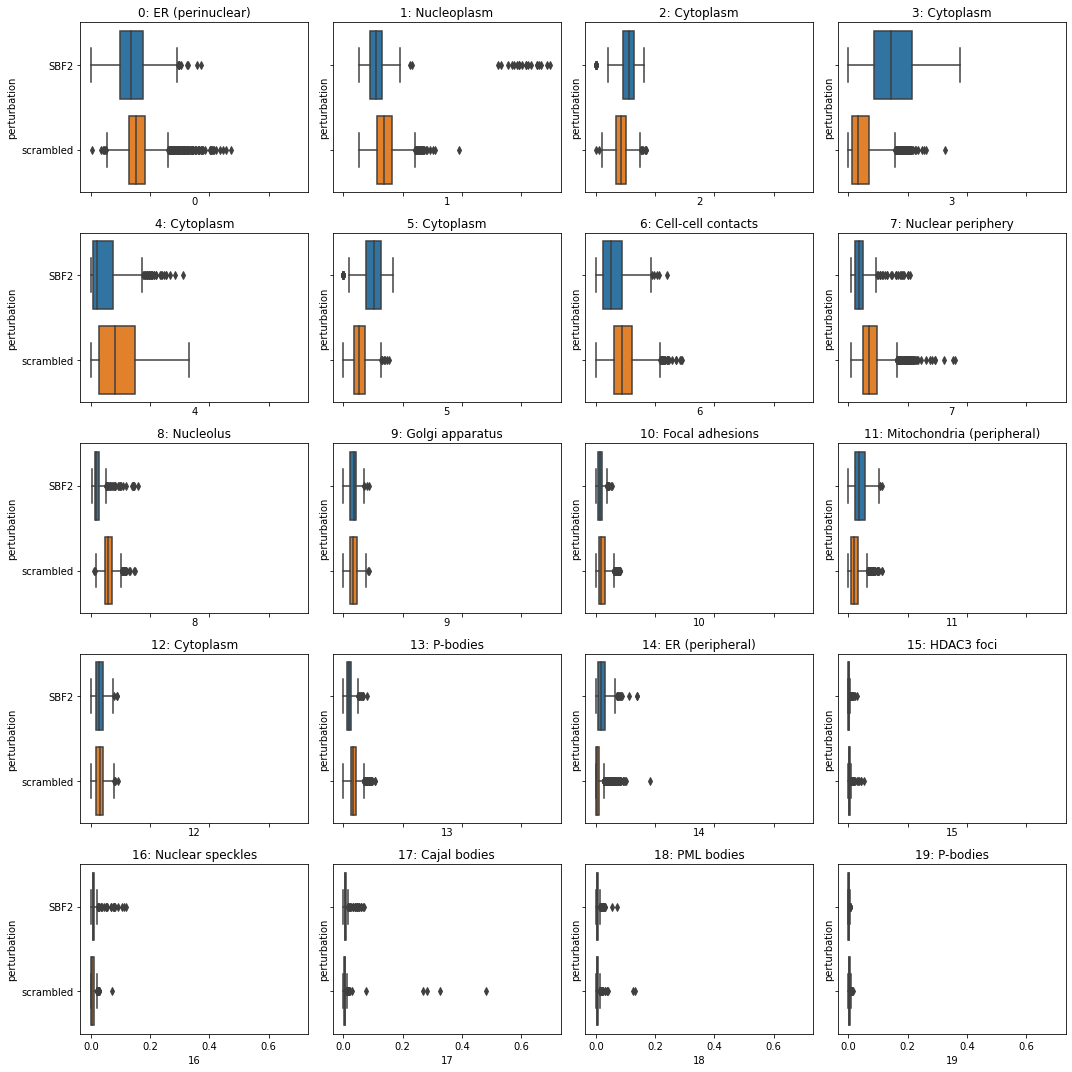

In [104]:
estimator = lambda x: x.std / x.mean()

fig, axes = plt.subplots(5,4, figsize=(15,15), sharey=True, sharex=True)
for i, ax in enumerate(axes.flat):
    if i > 19:
        ax.axis('off')
        continue
    sns.boxplot(data=sizes, x=str(i), y='perturbation', ax=ax) #), estimator=estimator)
    ax.set_title(f"{i}: {annotation.loc[i]['annotation']}")
#plt.xlim(0,5)
plt.tight_layout()

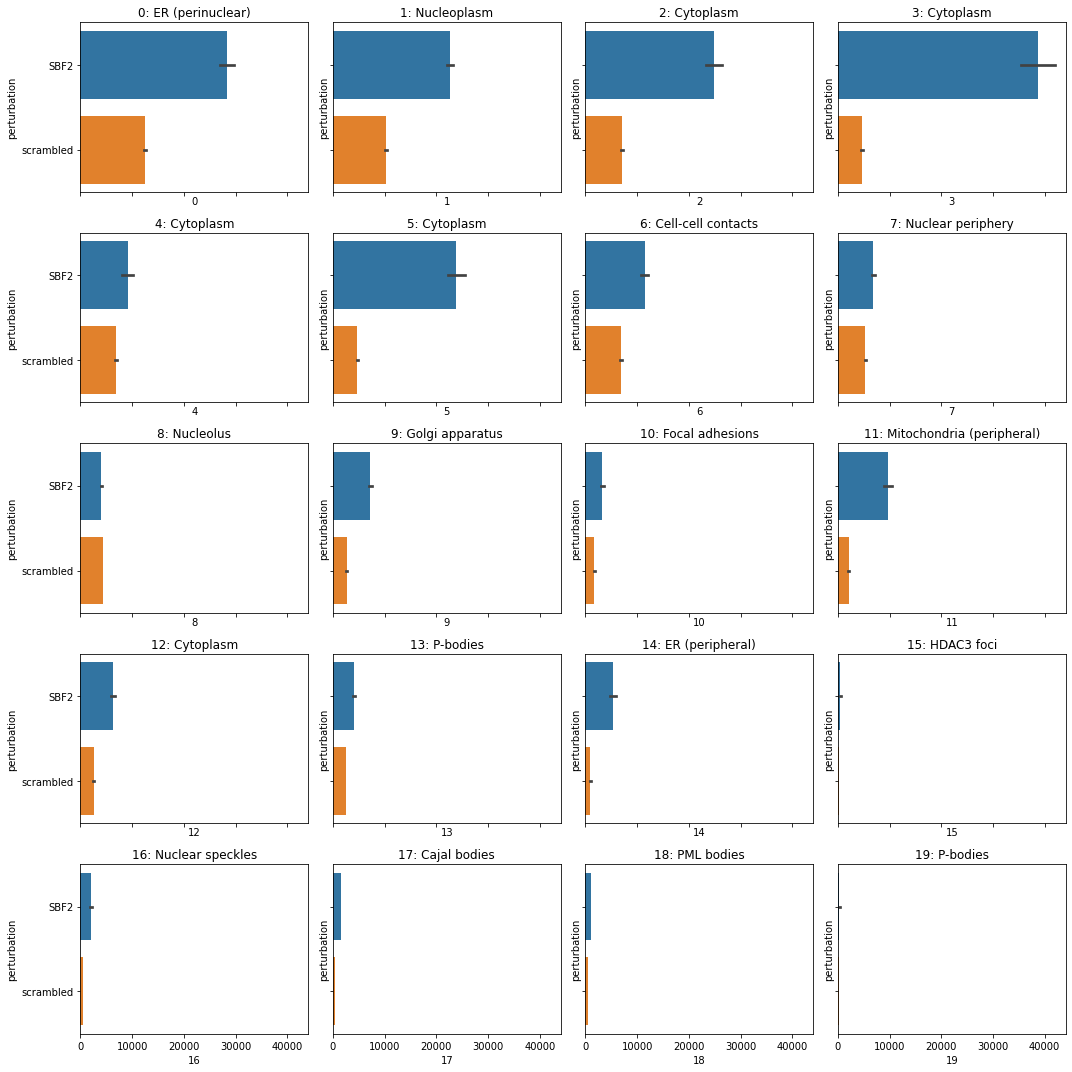

In [22]:
estimator = lambda x: x.mean()

fig, axes = plt.subplots(5,4, figsize=(15,15), sharey=True, sharex=True)
for i, ax in enumerate(axes.flat):
    if i > 19:
        ax.axis('off')
        continue
    sns.barplot(data=sizes, x=str(i), y='perturbation', ax=ax, estimator=estimator)
    ax.set_title(f"{i}: {annotation.loc[i]['annotation']}")
plt.tight_layout()